Hola Alejandro!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Descripcion general del proyecto <a id='intro'></a>
En este proyecto tendremos que optimizar los gastos en marketing en el departamento analítico de Y.Afisha.Para este proyecto contamos con 3 tablas diferentes que contienen informacion la primera llamada 'visits' , sobre las visitas a Y.Afisha desde enero de 2017 hasta diciembre de 2018; el segundo archivo llamado 'orders con todos los pedidos del periodo y por ultimo la tabla  de costs  con los gastos hechos en marketing.
Los objetivos a investigar son:
Cómo los clientes usan el servicio;
Cuándo empiezan a comprar;
Cuánto dinero aporta cada cliente a la compañía;
Cuándo los ingresos cubren el costo de adquisición de los clientes.
Este proyecto consistirá en tres etapas:

Descripción de los datos,
Preprocesamiento de datos y 
Conclusiones(aconsejar a los expertos de marketing cuánto dinero invertir y dónde).







In [2]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Paso 1. Descargo los datos y hago el preprocesamiento 


In [3]:
#Cargamos los archivos csv's
costs = pd.read_csv('/datasets/costs_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
visits = pd.read_csv('/datasets/visits_log_us.csv')

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Para mantener un mejor código te recomiendo que agregues un espacio a cada lado del igual
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante:Listo se añaden espaciospara codigo mas legible.</b> <a class=“tocSkip”></a>
</div>

# Limpieza de datos

In [6]:
#Damos una vista general a los datos
display(visits.head()),display(orders.head()),display(costs.head())

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


(None, None, None)

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Esta forma de presentar tus DataFrame no es recomendable, como puedes ver el output obtenido no se entiende muy bien. Te recomiendo que uses `.head()` y así muestres los primeros 5 resultados.
    
Y para que se muestre el resultado en formato de tabla puedes usar `display()` o aplicar el head en celdas separadas donde solo se ejecute esa línea.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante:Se agrega el display y el head.</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class="tocSkip"></a>

Buen trabajo con las correcciones!

Verificamos que no existan Nan o valores duplicados.

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
visits.duplicated().sum()

0

In [6]:
orders.isna().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [7]:
orders.duplicated().sum()


0

In [8]:
costs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [9]:
costs.duplicated().sum()

0

Podemos ver que los dataframes no tienen valores nulos ni valores duplicados.

Los archivos scv no tienen un tipo de variable fecha por lo tanto, tendremos que cambiar las columnas que se refieran al tiempo, a tipo fecha, ademas, cambiaremos los nombres de las columnas a minusculas y a snake_case.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo revisando datos ausentes y duplicados, te recomiendo que también apliques `.info()` para el resto de datasets
</div>

## Preprocesamiento de datos


In [10]:
#Cambiamos los datos de tiempo a tipo fecha

columns_new={'End Ts':'end_session',
           'Start Ts':'start_session'}
visits=visits.rename(columns=columns_new)

visits['end_session']=pd.to_datetime(visits['end_session'])
visits['start_session']=pd.to_datetime(visits['start_session'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Device         359400 non-null  object        
 1   end_session    359400 non-null  datetime64[ns]
 2   Source Id      359400 non-null  int64         
 3   start_session  359400 non-null  datetime64[ns]
 4   Uid            359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [11]:
orders= orders.rename(columns={'Buy Ts':'buy_dt'})
orders
orders['buy_dt']=pd.to_datetime(orders['buy_dt'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_dt   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [12]:

costs['dt']=pd.to_datetime(costs['dt'])
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [13]:
#añado las columnas de day, week and month para poder hacer los analizos a lo largo del tiempo.
#Se pueden cargar los datos  de estas dos maneras, sin embargo al sacar el tiempo de vida con ('np.datetime64[M]') puede haber
#variaciones o valores nulos.
visits['day']= visits['start_session'].dt.to_period('D').dt.start_time
visits['week']= visits['start_session'].dt.to_period('W').dt.start_time
visits['month']= visits['start_session'].dt.to_period('M').dt.start_time
orders['day']= orders['buy_dt'].dt.to_period('D').dt.start_time
orders['week']= orders['buy_dt'].dt.to_period('W').dt.start_time
orders['month']= orders['buy_dt'].dt.to_period('M').dt.start_time
costs['day']= costs['dt'].dt.to_period('D').dt.start_time
costs['week']= costs['dt'].dt.to_period('W').dt.start_time
costs['month']= costs['dt'].dt.to_period('M').dt.start_time
visits['day']= visits['start_session'].astype('datetime64[D]')
visits['week']= visits['start_session'].astype('datetime64[W]')
visits['month']= visits['start_session'].astype('datetime64[M]')
orders['day']= orders['buy_dt'].astype('datetime64[D]')
orders['week']= orders['buy_dt'].astype('datetime64[W]')
orders['month']= orders['buy_dt'].astype('datetime64[M]')
costs['day']= costs['dt'].astype('datetime64[D]')
costs['week']= costs['dt'].astype('datetime64[W]')
costs['month']= costs['dt'].astype('datetime64[M]')

orders.tail(30)


,buy_dt,Revenue,Uid,day,week,month
50385,2018-05-31 22:19:00,1.53,13142765597017713277,2018-05-31,2018-05-31,2018-05-01
50386,2018-05-31 22:23:00,3.67,10910587539790958081,2018-05-31,2018-05-31,2018-05-01
50387,2018-05-31 22:26:00,17.60,11008267452526568440,2018-05-31,2018-05-31,2018-05-01
50388,2018-05-31 22:31:00,3.67,11195922511132745019,2018-05-31,2018-05-31,2018-05-01
50389,2018-05-31 22:37:00,0.73,3494439906345197228,2018-05-31,2018-05-31,2018-05-01
50390,2018-05-31 22:45:00,3.48,13371827216221316036,2018-05-31,2018-05-31,2018-05-01
50391,2018-05-31 22:49:00,0.61,16499949084511921710,2018-05-31,2018-05-31,2018-05-01
50392,2018-05-31 22:50:00,2.44,15116668155510764243,2018-05-31,2018-05-31,2018-05-01
50393,2018-05-31 22:57:00,6.60,12484396335714047199,2018-05-31,2018-05-31,2018-05-01
50394,2018-05-31 22:58:00,0.85,11637259703803638683,2018-05-31,2018-05-31,2018-05-01


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el preprocesamiento previo al cálculo de métricas, un dataset limpio es clave para obtener métricas correctas
</div>

# Paso 2. Haz informes y calcula métricas  con la talbla visits

Vamos a mostrar cuantos visitantes unicos tuvimos por dia, mes y año y posteriormente, cuantas visitas en total(un usuario unico puede entrar varias veces) tuvimos por los mismos periodos.Graficaremos con lineas los resultados.

In [14]:
#Calculo de visitas UNICAS por dia,semana y mes.
visits_per_day= visits.groupby('day').agg({'Uid':['nunique']})
visits_per_week= visits.groupby('week').agg({'Uid':['nunique']})
visits_per_month= visits.groupby('month').agg({'Uid':['nunique']})

visits_per_day,visits_per_week,visits_per_month

(               Uid
            nunique
 day               
 2017-06-01     605
 2017-06-02     608
 2017-06-03     445
 2017-06-04     476
 2017-06-05     820
 ...            ...
 2018-05-27     620
 2018-05-28    1039
 2018-05-29     948
 2018-05-30    1289
 2018-05-31    1997
 
 [364 rows x 1 columns],
                Uid
            nunique
 week              
 2017-06-01    4082
 2017-06-08    3311
 2017-06-15    2844
 2017-06-22    3079
 2017-06-29    3055
 2017-07-06    3563
 2017-07-13    4790
 2017-07-20    2978
 2017-07-27    2505
 2017-08-03    2343
 2017-08-10    2658
 2017-08-17    2856
 2017-08-24    3337
 2017-08-31    4056
 2017-09-07    4311
 2017-09-14    4625
 2017-09-21    5377
 2017-09-28    6888
 2017-10-05    7535
 2017-10-12    6896
 2017-10-19    7375
 2017-10-26    7638
 2017-11-02    7226
 2017-11-09    7441
 2017-11-16    8294
 2017-11-23   10716
 2017-11-30    8122
 2017-12-07    8575
 2017-12-14    7611
 2017-12-21    7597
 2017-12-28    7334
 2018-01-04  

Podemos ver que el numero de usuarios va incrementando mes con mes, hasta diciembre que es su pico mas alto y despues vuelve a decender poco a poco.

In [15]:
visits_per_day.describe()

,Uid
,nunique
count,364.000000
mean,907.991758
std,370.513838
min,1.000000
25%,594.000000
50%,921.000000
75%,1173.000000
max,3319.000000


<AxesSubplot:xlabel='Days', ylabel='Usuarios unicos'>

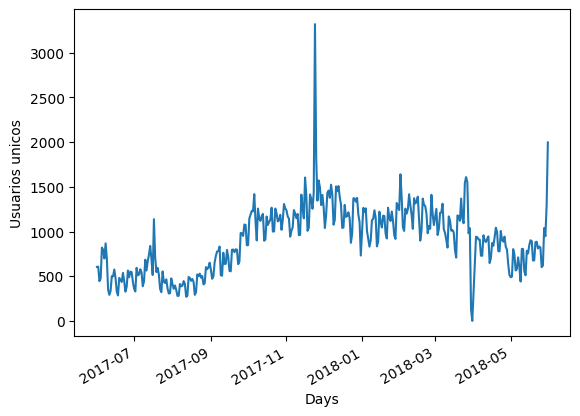

In [16]:
visits_per_day.plot(kind='line',
                    legend=False,
                   xlabel= 'Days',
                   ylabel= 'Usuarios unicos')

In [17]:
visits_per_week.describe()

,Uid
,nunique
count,53.000000
mean,5724.415094
std,2096.119936
min,1997.000000
25%,4056.000000
50%,5894.000000
75%,7441.000000
max,10716.000000


<AxesSubplot:xlabel='week', ylabel='Usuarios unicos'>

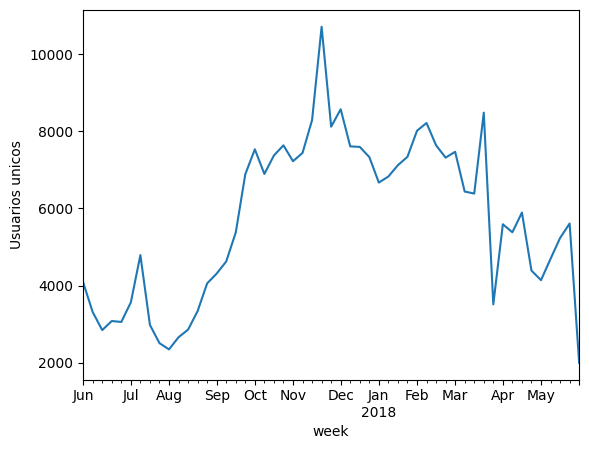

In [18]:
visits_per_week.plot(kind='line',
                    legend=False,
                    xlabel= 'week',
                    ylabel= 'Usuarios unicos')

In [19]:
visits_per_month.describe()

,Uid
,nunique
count,12.000000
mean,23228.416667
std,7546.380462
min,11631.000000
25%,17777.000000
50%,24240.500000
75%,28984.750000
max,32797.000000


<AxesSubplot:xlabel='Months', ylabel='Usuarios unicos'>

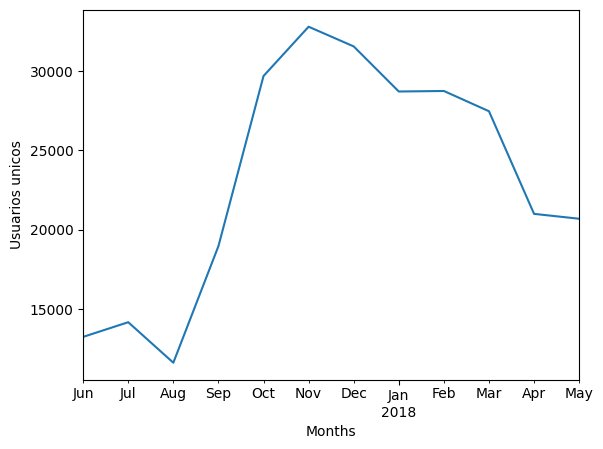

In [20]:
visits_per_month.plot(kind='line',
                    legend=False,
                    xlabel= 'Months',
                    ylabel= 'Usuarios unicos')

Ahora  sacamos las visitas totales por dia, mes y año(un usuarios puede hacer varias visitas.

In [21]:
total_visits_per_day= visits.groupby('day').agg({'Uid':'count'})
total_visits_per_week= visits.groupby('week').agg({'Uid':'count'})
total_visits_per_month= visits.groupby('month').agg({'Uid':'count'})
total_visits_per_day.describe()

,Uid
count,364.000000
mean,987.362637
std,418.994796
min,1.000000
25%,635.500000
50%,1003.000000
75%,1280.000000
max,4042.000000


<AxesSubplot:xlabel='days', ylabel='Total de visitas'>

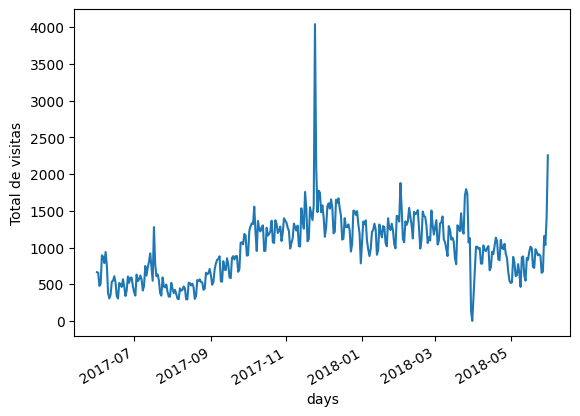

In [22]:
total_visits_per_day.plot(kind='line',
                    legend=False,
                    xlabel= 'days',
                    ylabel= 'Total de visitas')


In [23]:
total_visits_per_week.describe()

,Uid
count,53.000000
mean,6781.132075
std,2622.489026
min,2256.000000
25%,4669.000000
50%,6970.000000
75%,8793.000000
max,14186.000000


<AxesSubplot:xlabel='week', ylabel='Total de visitas'>

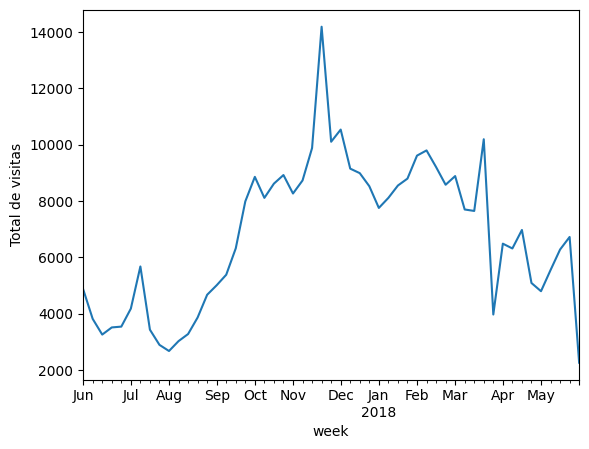

In [24]:
total_visits_per_week.plot(kind='line',
                    legend=False,
                    xlabel= 'week',
                    ylabel= 'Total de visitas')

In [25]:
total_visits_per_month.describe()

,Uid
count,12.000000
mean,29950.000000
std,10307.835846
min,14355.000000
25%,22387.250000
50%,31157.000000
75%,37362.250000
max,43969.000000


<AxesSubplot:xlabel='Month', ylabel='Total de visitas'>

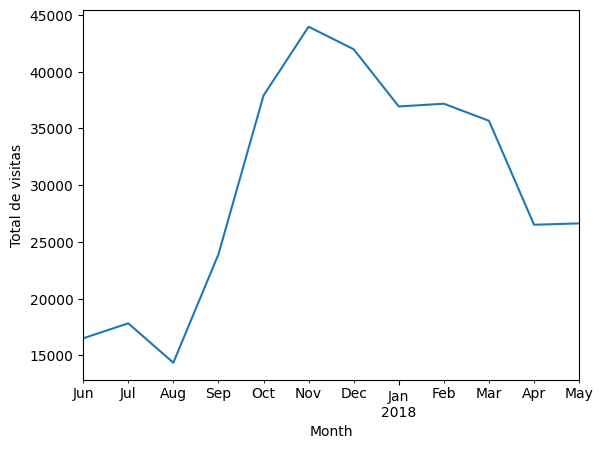

In [26]:
total_visits_per_month.plot(kind='line',
                    legend=False,
                    xlabel= 'Month',
                    ylabel= 'Total de visitas')

Podemos visualizar que entre Noviembre y Diciembre se encuentran los picos mas altos tanto de visitas por usuarios unicos y de visitas totales donde puede haber mas de una visita por cada usuario.

Ahora vamos a sacar cual es la duracion de cada sesión

In [27]:
visits['session_duration']= (visits['end_session'] - visits['start_session']).dt.seconds
#Añadimos percentiles para poder visualizar mejor si hay valores atipicos como el max
visits['session_duration'].describe(percentiles=[0.25,0.5,0.75,0.90,0.99])

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
90%        1620.000000
99%        4500.000000
max       84480.000000
Name: session_duration, dtype: float64

Como sacamos la diferencia en segundos, la duracion esta en segundos asi que dividimos los resultados entre 3600 segundos que es una hora y podemos ver que hay una sesion que duro 23 horas , lo cual seguramente es un outlyer.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo analizando la cantidad de visitantes!
</div>

In [28]:
84480/3600

23.466666666666665

El 99% de los usuarios dura 1.25 horas en la sesion, mientras que el 25% pasa dos minutos, podemos ver con el metodo describe() que tenemos posibles outlyers de 23 horas de sesion.

<AxesSubplot:>

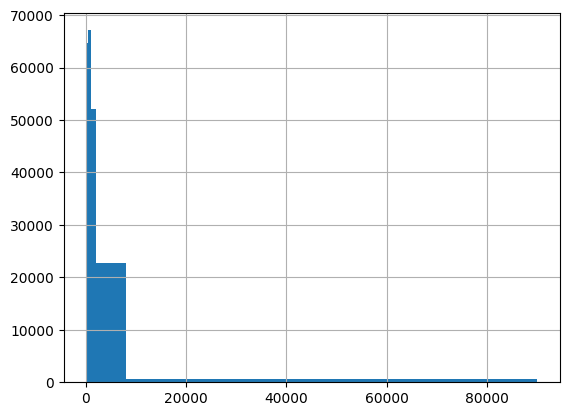

In [29]:
visits['session_duration'].hist(bins = [120, 240, 480, 1000, 2000, 8000, 90000])

In [30]:
#para empezar a crear las cohortes,creamos la variable first_visits para sacar las primeras visitas de cada usuario.
first_visits=(visits.groupby(['Uid']).agg({'start_session':'min'}))
first_visits['first_month']=first_visits["start_session"].dt.to_period("M").dt.start_time

first_visits.rename(columns={'start_session':'first_visit_at'},inplace=True)
             
# first_visits.reset_index(inplace=True) 
            
# first_visits=pd.merge(
#     visits,
#     first_visits
#     , on ='Uid')
first_visits

,first_visit_at,first_month
Uid,,
11863502262781,2018-03-01 17:27:00,2018-03-01
49537067089222,2018-02-06 15:55:00,2018-02-01
297729379853735,2017-06-07 18:47:00,2017-06-01
313578113262317,2017-09-18 22:49:00,2017-09-01
325320750514679,2017-09-30 14:29:00,2017-09-01
...,...,...
18446403737806311543,2017-11-30 03:36:00,2017-11-01
18446424184725333426,2017-12-06 20:32:00,2017-12-01
18446556406699109058,2018-01-01 16:29:00,2018-01-01


In [31]:
#Creamos una nueva tabla uniendo visits y first_visits para poder crear una tabla de cohortes.
#visits_with_cohort= pd.merge(visits,first_visits[['Uid','first_month']], on= 'Uid')
visits_with_cohort= visits.join(first_visits,on='Uid')

# visits_with_cohort['cohort_lifetime']=(visits_with_cohort['month'] - visits_with_cohort['first_month']) /np.timedelta64(1,'M')
# visits_with_cohort['cohort_lifetime']=visits_with_cohort['cohort_lifetime'].astype(int)
visits_with_cohort['cohort_lifetime']= (visits_with_cohort['month'].dt.month -  visits_with_cohort['first_month'].dt.month)
visits_with_cohort['cohort_lifetime'] += 12*(visits_with_cohort['month'].dt.year -  visits_with_cohort['first_month'].dt.year)

visits_with_cohort

,Device,end_session,Source Id,start_session,Uid,day,week,month,session_duration,first_visit_at,first_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,1080,2017-12-20 17:20:00,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,1680,2018-02-19 16:53:00,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,1440,2018-03-09 20:05:00,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,0,2017-12-27 14:06:00,2017-12-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,2017-07-27,2017-07-01,19,2017-07-29 19:07:00,2017-07-01,0
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,2018-01-25,2018-01-01,19,2018-01-25 17:38:00,2018-01-01,0
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,2018-03-01,2018-03-01,19,2018-03-03 10:12:00,2018-03-01,0
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,2017-11-02,2017-11-01,19,2017-11-02 10:12:00,2017-11-01,0


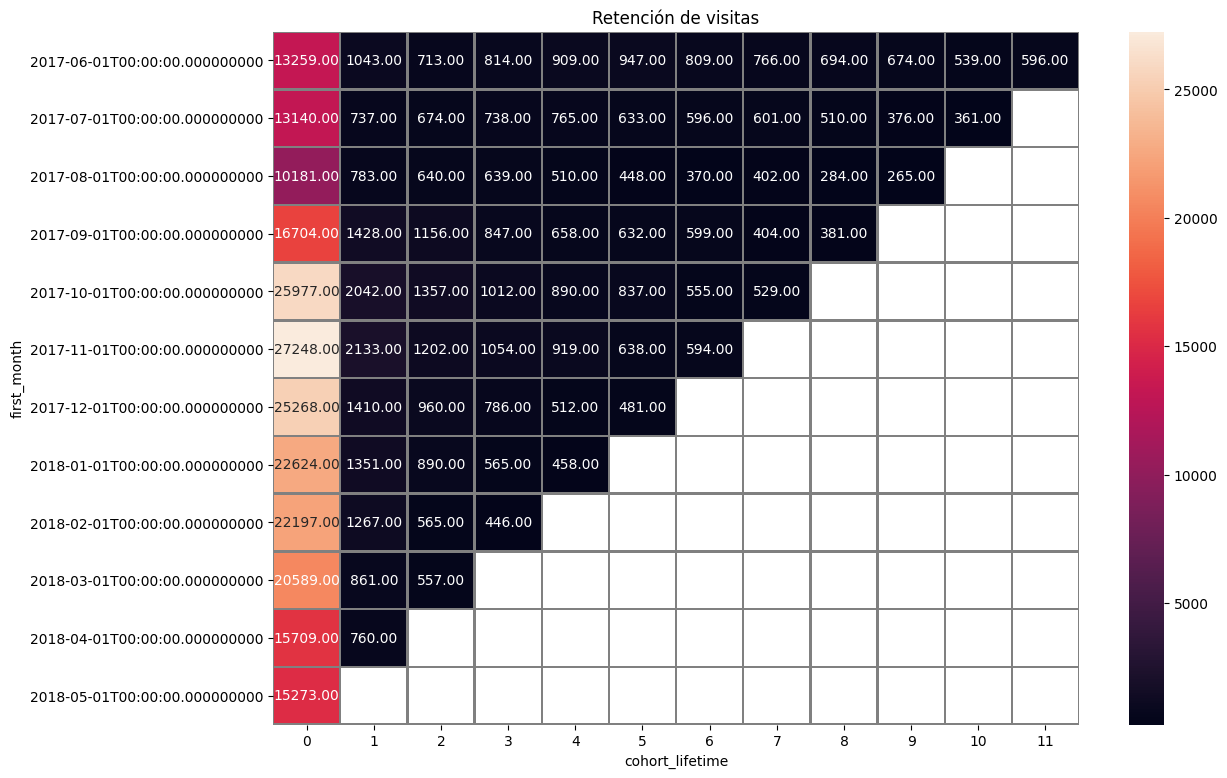

In [32]:
#Creamos la tabla de cohortes con un pivot_table
visits_retention=visits_with_cohort.pivot_table(
                    index='first_month',
                    columns='cohort_lifetime',
                    values='Uid',
                    aggfunc='nunique'
)
visits_retention
#creamos el heatmap

plt.figure(figsize=(13, 9))
plt.title('Retención de visitas')
sns.heatmap(
    visits_retention,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='grey')

plt.show()




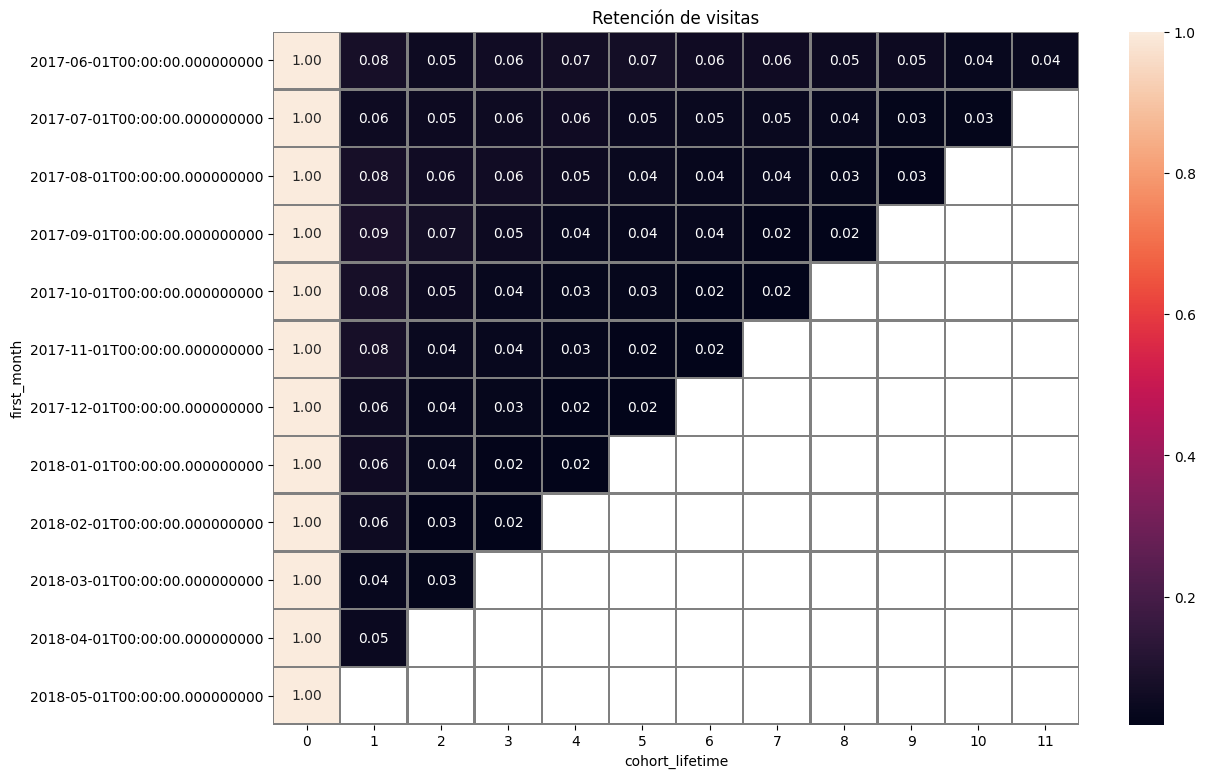

In [33]:
#Lo que nos importa es la tasa de retencion , asi que sacamos el porcentaje de la tasa por cada mes del año DIVIDIENDO LA PRIMERA COLUMNA POR CADA COLUMNA QUE QUERAMOS SACAR EL PROMEDIO
visits_retention_rate= visits_retention.copy()
for col in visits_retention_rate.columns:
    visits_retention_rate[col]=visits_retention_rate[col] / visits_retention[0]
visits_retention_rate.fillna('')

plt.figure(figsize=(13, 9))
plt.title('Retención de visitas')
sns.heatmap(
    visits_retention_rate,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='grey')

plt.show()


In [34]:
visits_retention_rate.iloc[:,1:].mean()


cohort_lifetime
1     0.065167
2     0.046333
3     0.042760
4     0.040595
5     0.039444
6     0.036957
7     0.037509
8     0.035465
9     0.035159
10    0.034062
11    0.044951
dtype: float64

Al observar el promedio de usuarios que regresan por mes, vemos que hay una caida en la retencion de clientes, por ejemplo el 6.5% de los usuarios que visitaron la pagina por primera vez(en el mes 0, regresan al mes 1.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, planteaste una conclusión correcta y una visualización muy buena para este caso
</div>

<AxesSubplot:xlabel='cohort_lifetime'>

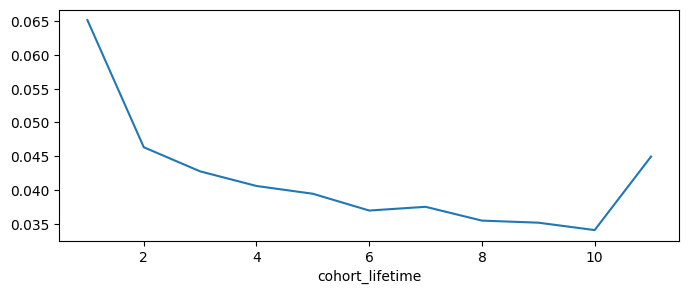

In [35]:
visits_retention_rate.iloc[:,1:].mean().plot(kind='line',figsize=[8, 3])

¿Cuándo la gente empieza a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el/la usuario/a se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el/la usuario/a podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d.  Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo).
¿Cuántos pedidos hacen durante un período de tiempo dado?
¿Cuál es el tamaño promedio de compra?
¿Cuánto dinero traen? (LTV)

Marketing:
 
¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)
¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?
¿Cuán rentables eran las inversiones? (ROMI)

Traza gráficos para mostrar cómo difieren estas métricas para varios dispositivos y fuentes de anuncios y cómo cambian con el tiempo. 

Paso 3. Escribe una conclusión: aconseja a los expertos de marketing cuánto dinero invertir y dónde

¿Qué fuentes/plataformas recomendarías?  Fundamenta tu selección: ¿en qué métricas te enfocaste?  ¿Por qué? ¿Qué conclusiones sacaste después de encontrar los valores métricos?

# 2. Ventas

## 2.1 Analisis KPI

In [36]:
#Sacamos las primeras ordenes de cada usuario unicos para savar el tiempo que tardan los usuarios en hacer su primera compra

first_orders=orders.groupby('Uid').agg({'buy_dt':'min'}).reset_index()
first_orders['first_order_month']=first_orders['buy_dt'].dt.to_period("M").dt.start_time
first_orders.rename(columns={'buy_dt':'first_order_at'},inplace=True)
first_orders

,Uid,first_order_at,first_order_month
0,313578113262317,2018-01-03 21:51:00,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-01
2,2429014661409475,2017-10-11 18:33:00,2017-10-01
3,2464366381792757,2018-01-28 15:54:00,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-01
...,...,...,...
36518,18445147675727495770,2017-11-24 09:03:00,2017-11-01
36519,18445407535914413204,2017-09-22 23:55:00,2017-09-01
36520,18445601152732270159,2018-03-26 22:54:00,2018-03-01
36521,18446156210226471712,2018-02-18 19:34:00,2018-02-01


In [37]:
# hacemos merge entre las primeras ordenes y las primeras visitas para poder sacar el tiempo que tardan los usiarios 
#para su primera compra
dt_with_firststwotable=pd.merge(first_orders[['Uid','first_order_month','first_order_at']],
                               visits_with_cohort[['Uid','first_visit_at','first_month','Source Id']],
                               on='Uid'
                              ) 

dt_with_firststwotable.head(5)


,Uid,first_order_month,first_order_at,first_visit_at,first_month,Source Id
0,313578113262317,2018-01-01,2018-01-03 21:51:00,2017-09-18 22:49:00,2017-09-01,2
1,313578113262317,2018-01-01,2018-01-03 21:51:00,2017-09-18 22:49:00,2017-09-01,2
2,313578113262317,2018-01-01,2018-01-03 21:51:00,2017-09-18 22:49:00,2017-09-01,2
3,1575281904278712,2017-06-01,2017-06-03 10:13:00,2017-06-03 10:13:00,2017-06-01,10
4,1575281904278712,2017-06-01,2017-06-03 10:13:00,2017-06-03 10:13:00,2017-06-01,10


¿Cuándo la gente empieza a comprar?

In [38]:
# conversion_timestamps['time_to_buy']= (conversion_timestamps['first_order_at'] - conversion_timestamps['first_visit_at'])
# conversion_timestamps['time_to_buy'] /= np.timedelta64(1,'h')
#Sacamos la conversion del tiempo que se tardan los usuarios en hacer una compra desde el dia en que se registraron hasta el dia de la compra
dt_with_firststwotable['time_to_buy']= (dt_with_firststwotable['first_order_at'] - dt_with_firststwotable['first_visit_at']).dt.days
dt_with_firststwotable

,Uid,first_order_month,first_order_at,first_visit_at,first_month,Source Id,time_to_buy
0,313578113262317,2018-01-01,2018-01-03 21:51:00,2017-09-18 22:49:00,2017-09-01,2,106
1,313578113262317,2018-01-01,2018-01-03 21:51:00,2017-09-18 22:49:00,2017-09-01,2,106
2,313578113262317,2018-01-01,2018-01-03 21:51:00,2017-09-18 22:49:00,2017-09-01,2,106
3,1575281904278712,2017-06-01,2017-06-03 10:13:00,2017-06-03 10:13:00,2017-06-01,10,0
4,1575281904278712,2017-06-01,2017-06-03 10:13:00,2017-06-03 10:13:00,2017-06-01,10,0
...,...,...,...,...,...,...,...
97389,18446156210226471712,2018-02-01,2018-02-18 19:34:00,2017-11-07 10:01:00,2017-11-01,5,103
97390,18446156210226471712,2018-02-01,2018-02-18 19:34:00,2017-11-07 10:01:00,2017-11-01,4,103
97391,18446156210226471712,2018-02-01,2018-02-18 19:34:00,2017-11-07 10:01:00,2017-11-01,1,103
97392,18446167067214817906,2017-10-01,2017-10-17 10:16:00,2017-10-17 10:05:00,2017-10-01,5,0


In [39]:
#sacamos el promedio de la tasa de conversion de los usuarios y creamos grupos donde los usuarios son 0d,1d,2d
total_users= len(dt_with_firststwotable)
          
# print(f"""
# conversion 0d:{sum(conversion_timestamps['time_to_buy'] == 0) / total_users}
# conversion 1d:{sum(conversion_timestamps['time_to_buy'] == 1) / total_users}
# conversion 2d:{sum(conversion_timestamps['time_to_buy'] == 2) / total_users}

#     """ )   

print(f"""
Conversion 0d: {sum(dt_with_firststwotable['time_to_buy'] == 0) / total_users}
Conversion 1d: {sum(dt_with_firststwotable['time_to_buy'] == 1)/ total_users}
Conversion 2d: {sum(dt_with_firststwotable['time_to_buy'] == 2) / total_users}

Conversion 10d: {sum(dt_with_firststwotable['time_to_buy'] == 10) / total_users}
Conversion 100d: {sum(dt_with_firststwotable['time_to_buy'] == 100) / total_users}
""")
# zero_days=sum(dt_with_firststwotable['time_to_buy'] == 0) / total_users
# one_day=sum(dt_with_firststwotable['time_to_buy'] == 1) / total_users


Conversion 0d: 0.49711481200073926
Conversion 1d: 0.039673901883072876
Conversion 2d: 0.0197650779308787

Conversion 10d: 0.0058833193009836336
Conversion 100d: 0.001632544099225825



<AxesSubplot:>

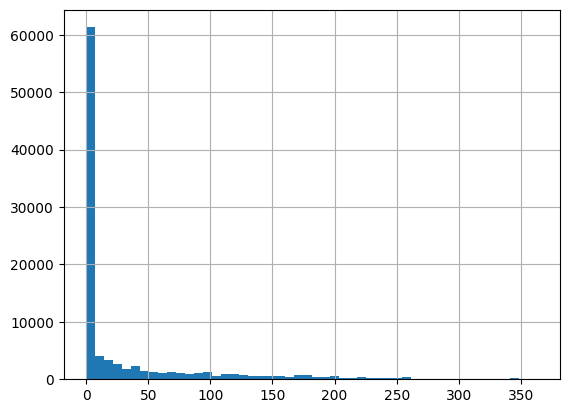

In [40]:
dt_with_firststwotable['time_to_buy'].hist(bins=50)

In [41]:
dt_with_firststwotable.groupby('Source Id').agg({'time_to_buy':'mean'})


,time_to_buy
Source Id,
1,34.420417
2,42.471122
3,30.747070
4,31.977920
5,23.044368
7,0.000000
9,43.035044
10,33.663675


En promedio la fuente por la que tardaron menos en realizar una compra fue la numero 5 y la que mas tardo fue la numero 9.

<function matplotlib.pyplot.show(close=None, block=None)>

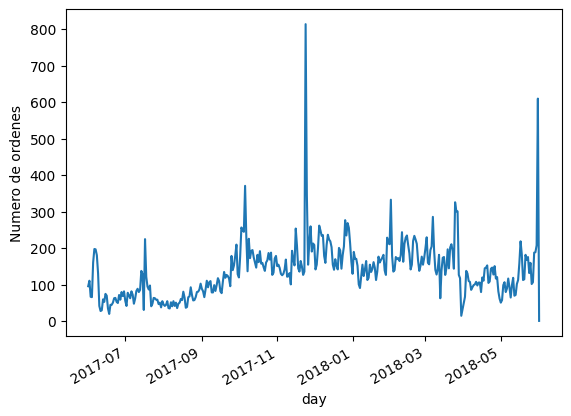

In [42]:
#Sacamos el numero total de las ordenes realizadas cadadia, semana y mes y el promedio de ordenes por año.
total_orders_by_day=orders.groupby('day')['buy_dt'].count()
total_orders_by_day.plot(kind='line',
                         ylabel='Numero de ordenes')
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

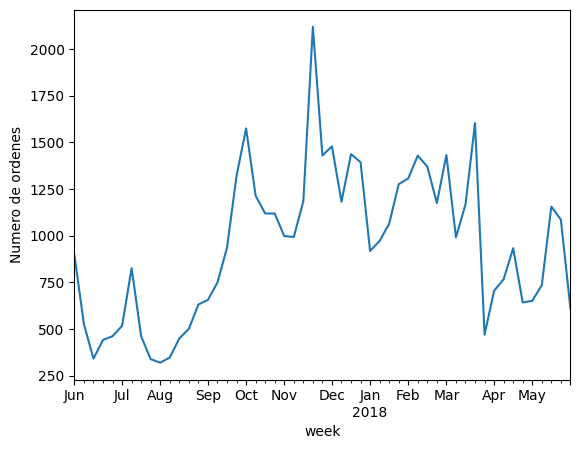

In [43]:
total_orders_by_week=orders.groupby('week')['buy_dt'].count()
total_orders_by_week.plot(kind='line',
                         ylabel='Numero de ordenes')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

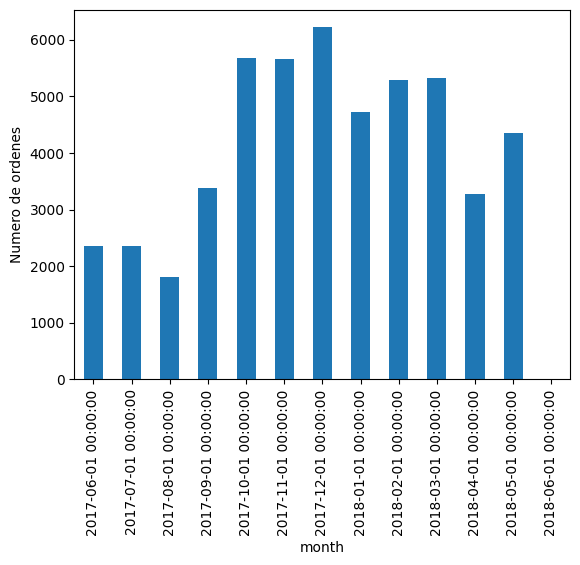

In [44]:
total_orders_by_month=orders.groupby('month')['buy_dt'].count()
total_orders_by_month.plot(kind='bar',
                         ylabel='Numero de ordenes')
plt.show

In [45]:
total_orders_by_month_mean=orders.groupby('month')['Revenue'].sum()
total_orders_by_month_mean

month
2017-06-01     9557.49
2017-07-01    12539.47
2017-08-01     8758.78
2017-09-01    18345.51
2017-10-01    27987.70
2017-11-01    27069.93
2017-12-01    36388.60
2018-01-01    19417.13
2018-02-01    25560.54
2018-03-01    28834.59
2018-04-01    16858.06
2018-05-01    20735.98
2018-06-01        3.42
Name: Revenue, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

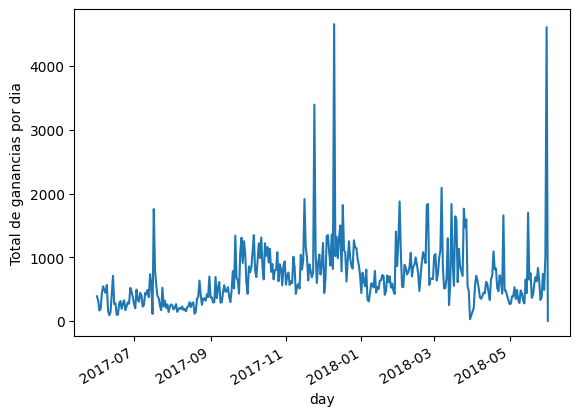

In [46]:
orders.groupby('day')['Revenue'].sum().plot(kind='line',
                                            ylabel='Total de ganancias por dia')
plt.show

<AxesSubplot:xlabel='week', ylabel='Total de ganancias por week'>

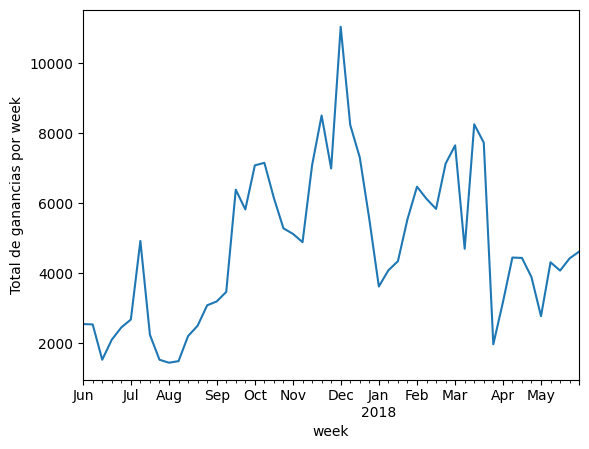

In [47]:
orders.groupby('week')['Revenue'].sum().plot(kind='line',
                                            ylabel='Total de ganancias por week')

<function matplotlib.pyplot.show(close=None, block=None)>

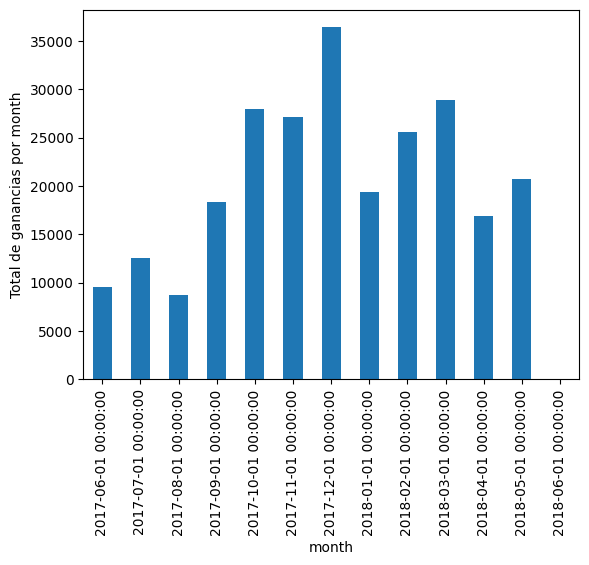

In [48]:
orders.groupby('month')['Revenue'].sum().plot(kind='bar',
                                            ylabel='Total de ganancias por month')
plt.show

El mayor numero de pedidos por mes lo hacen en diciembre de 2017

Sacamos el LTV de los usuarios

In [49]:
#Realizamos un merge para tener a la mano las columnas necesarias para sacar el tamaño de usuarios de la tabla orders
#de cada corte y la guardamos como 'first_orders_general_table'

first_orders_general_table=orders.merge(first_orders,on='Uid')

#Sacamos el numero unico de usuarios que hicieron compras por primera ves por mes y lo guasrdamos como 'zise_cohorts'
#utilizamos  'first_order_month' por que queremos formas cohortes por mes con la primera compra
zise_cohorts=first_orders_general_table.groupby('first_order_month').agg({'Uid':'nunique'}).reset_index().rename(columns={'Uid':'num_buyers'})
#sacamos el revenue total y las agrupamos por primeras ordenes al mes
revenue_total=first_orders_general_table.groupby(['first_order_month','month']).agg({'Revenue':'sum','Uid':'nunique'}).reset_index()
# revenue_total['cohort_orders']=((revenue_total['month'] - revenue_total['first_order_month'])/ np.timedelta64(1,'M')).astype(int)
revenue_total['life_time_cohort']= (revenue_total['month'].dt.month -  revenue_total['first_order_month'].dt.month)
revenue_total['life_time_cohort'] += 12*(revenue_total['month'].dt.year -  revenue_total['first_order_month'].dt.year)
#hacemos un merge para tener las columnas que vamos a dividir para el LTV que es la division entre las ganancias (Revenue), sumadas 
#y la suma de los valores unicos de los usuarios que hicieron su primera orden y lo llamamos 'merge_to_ltv'
merge_to_ltv=revenue_total.merge(zise_cohorts, on='first_order_month',)
merge_to_ltv['ltv']=merge_to_ltv['Revenue'] / merge_to_ltv['num_buyers']
orders_ltv=merge_to_ltv.pivot_table(
                    index='first_order_month',
                    columns='life_time_cohort',
                    values='ltv',#dividir esta entre la columna de los usuarrios
                    aggfunc='sum'
)#.cumsum(axis=1)
orders_ltv

life_time_cohort,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,0.485329,0.437637,0.954671,1.022531,0.735502,0.950440,0.581592,0.553213,0.605788,0.571261,0.256856
2017-07-01,6.010218,0.335211,0.623531,0.358976,0.176791,0.156048,0.120208,0.141820,0.161232,0.147145,0.155673,NaN
2017-08-01,5.276518,0.471993,0.458482,0.391277,0.494051,0.283540,0.210664,0.405007,0.292212,0.187978,NaN,NaN
2017-09-01,5.644529,1.117586,0.520930,3.975792,0.400558,0.647067,0.701608,0.243150,0.184006,NaN,NaN,NaN
2017-10-01,5.003733,0.535763,0.191394,0.157145,0.151560,0.120362,0.084816,0.115470,NaN,NaN,NaN,NaN
2017-11-01,5.154683,0.399233,0.199556,0.324952,0.148013,0.053879,0.114928,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,0.260374,0.925097,1.065275,0.312930,0.338047,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,0.294758,0.304281,0.142778,0.062698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,0.278274,0.078515,0.074144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
first_orders_general_table

,buy_dt,Revenue,Uid,day,week,month,first_order_at,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:10:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:27:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:29:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01 07:58:00,2017-06-01
...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-31,2018-05-01,2018-05-31 23:50:00,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-31,2018-05-01,2018-05-31 23:50:00,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-31,2018-05-01,2018-05-31 23:54:00,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-31,2018-05-01,2018-05-31 23:56:00,2018-05-01


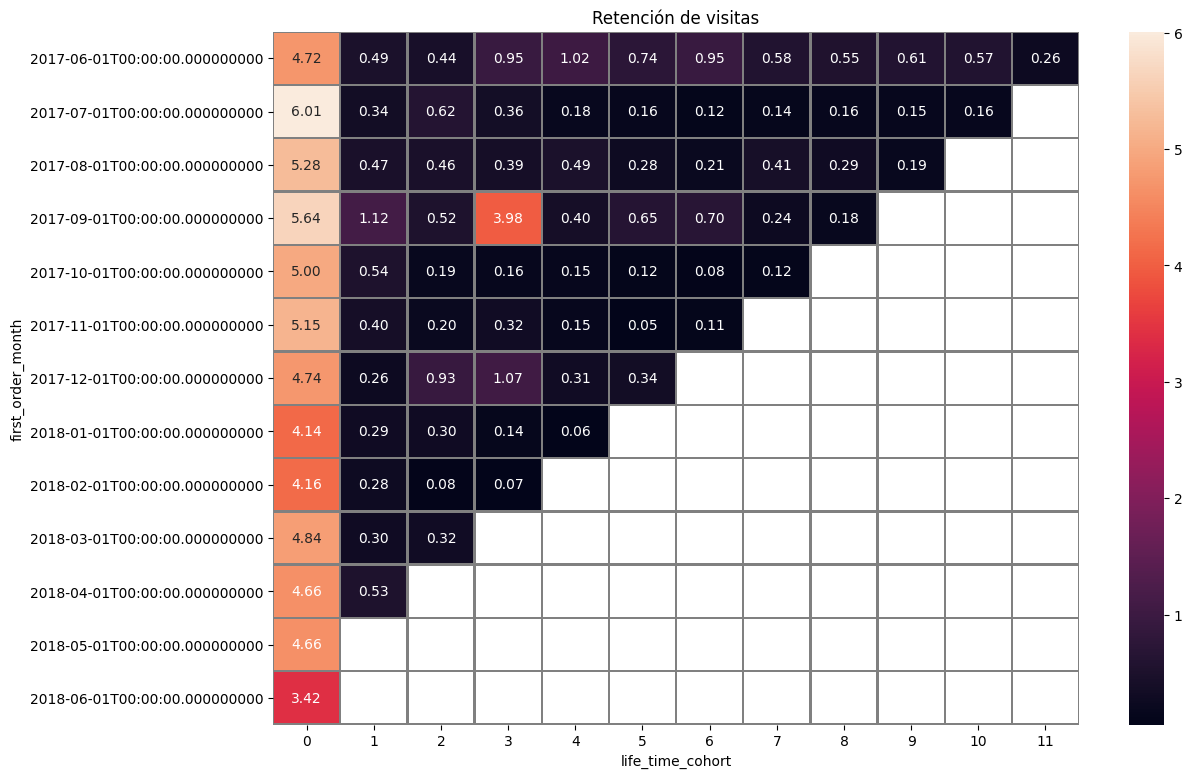

In [51]:
# Sacamos el mapa de calor o heatmap
plt.figure(figsize=(13, 9))
plt.title('Retención de visitas')
sns.heatmap(
    orders_ltv,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='grey')

plt.show()


In [52]:
first_orders_general_table_with_source=first_orders_general_table.merge(visits[['Uid','Source Id']],
                                                                               on='Uid')
first_orders_general_table_with_source  

,buy_dt,Revenue,Uid,day,week,month,first_order_at,first_order_month,Source Id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:10:00,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:27:00,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:29:00,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01 07:58:00,2017-06-01,3
...,...,...,...,...,...,...,...,...,...
761802,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-31,2018-05-01,2018-05-31 23:56:00,2018-05-01,4
761803,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-31,2018-05-01,2018-05-31 23:56:00,2018-05-01,5
761804,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-31,2018-05-01,2018-05-31 23:56:00,2018-05-01,3
761805,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-31,2018-05-01,2018-05-31 23:56:00,2018-05-01,4


 
Podemos observar en el headmap del ltv que al pasar de los meses hay una disminucion significativa  en los ingresos por usuario de cada cohorte, a excepcion de la cohorte de 1017-09-01 donde se puede observar un incremento despues de unos meses, sin embargpo vuelvem a caer demasado para los proximos meses.
 (lo que debe dar el primer valor4.72

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien realizado el análisis y visualización de LTV! Pero, ¿Que puedes concluir de esto? Siempre que muestres una visualización trata de redactar tu interpretación de la misma en base a como esto puede traer información de valor a la empresa
    
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante:Listo se añade la interpretacion de la gráfica.</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class="tocSkip"></a>

Buen trabajo con las correcciones!

# 3. Marketing


¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)

In [53]:
costo_total=costs['costs'].sum()
print(f'En total se gastaron:{costo_total} en Marketing')

En total se gastaron:329131.62 en Marketing


In [54]:

# costs_by_source=(costs.groupby(['source_id','month'])
#                  ['costs']
#                  .sum()
#                  .reset_index()
#                 )
# costs_by_source
costs_by_source=(costs.groupby('source_id')
                 ['costs']
                 .sum()
                 .reset_index()
                )
costs_by_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


Podemos observar que los costos de la fuente numero 4 son muy elevados con 141321.63 y los de la fuente 9 son los mas bajos.

<function matplotlib.pyplot.show(close=None, block=None)>

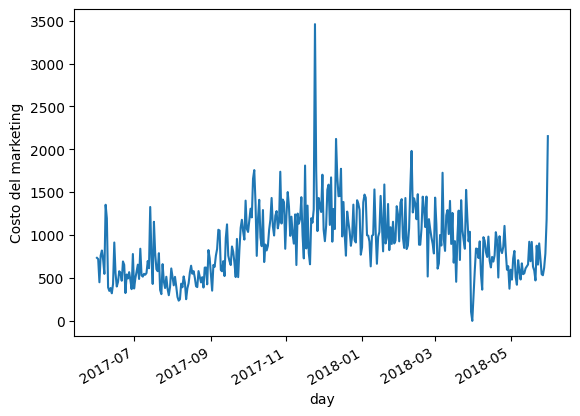

In [55]:
(costs.groupby('day')
            ['costs']
            .sum()
            .reset_index()
).plot(kind='line',
                  ylabel='Costo del marketing',
                  x='day',
                  legend=False)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

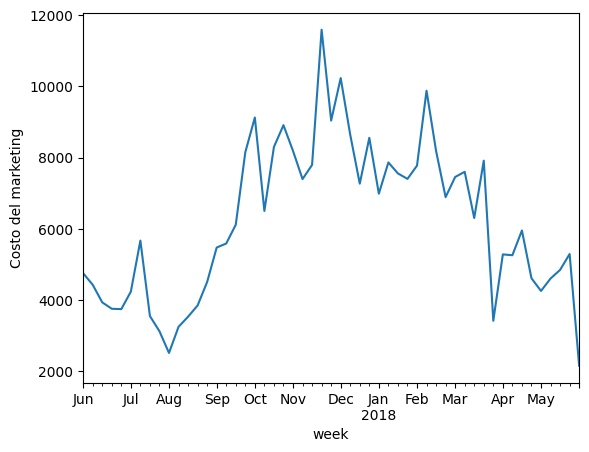

In [56]:
(costs.groupby('week')
            ['costs']
            .sum()
            .reset_index()
).plot(kind='line',
                  ylabel='Costo del marketing',
                  x='week',
                  legend=False)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

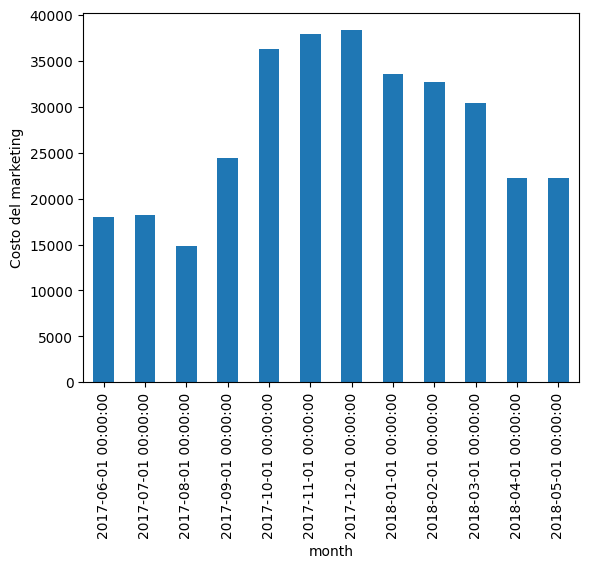

In [57]:
monthly_costs=(costs.groupby('month')
                 ['costs']
                 .sum()
                 .reset_index()
                )
monthly_costs.plot(kind='bar',
                  ylabel='Costo del marketing',
                  x='month',
                  legend=False)
plt.show

Calculamos el CAC o costo de adquisicion por cliente.


In [58]:
first_orders_with_sources=pd.merge(visits_with_cohort[['Source Id','Uid']],
                                   first_orders_general_table[['Uid','Revenue','day','week','month',
                                                               'first_order_at','first_order_month']],on='Uid'
                                  ).rename(columns={'Source Id':'source_id'})
first_orders_with_sources

,source_id,Uid,Revenue,day,week,month,first_order_at,first_order_month
0,9,16174680259334210214,2.33,2018-03-09,2018-03-08,2018-03-01,2018-03-09 20:25:00,2018-03-01
1,4,16174680259334210214,2.33,2018-03-09,2018-03-08,2018-03-01,2018-03-09 20:25:00,2018-03-01
2,5,16007536194108375387,2.44,2017-09-04,2017-08-31,2017-09-01,2017-09-04 12:46:00,2017-09-01
3,5,16007536194108375387,1.53,2017-10-28,2017-10-26,2017-10-01,2017-09-04 12:46:00,2017-09-01
4,5,16007536194108375387,1.53,2017-10-28,2017-10-26,2017-10-01,2017-09-04 12:46:00,2017-09-01
...,...,...,...,...,...,...,...,...
761802,3,6752020629696526518,4.15,2017-12-04,2017-11-30,2017-12-01,2017-12-04 12:46:00,2017-12-01
761803,4,11750532881998794555,3.67,2017-11-20,2017-11-16,2017-11-01,2017-11-20 23:43:00,2017-11-01
761804,4,11202626539189016002,3.05,2017-11-29,2017-11-23,2017-11-01,2017-11-29 20:33:00,2017-11-01
761805,10,12734910664455613822,0.49,2018-04-23,2018-04-19,2018-04-01,2018-04-23 21:16:00,2018-04-01


In [59]:
daily_costs=(costs
             .groupby(['day','source_id'])['costs']
             .sum()
             .reset_index()
            )
daily_costs


,day,source_id,costs
0,2017-06-01,1,75.20
1,2017-06-01,2,132.56
2,2017-06-01,3,349.38
3,2017-06-01,4,76.74
4,2017-06-01,5,73.24
...,...,...,...
2537,2018-05-31,3,822.30
2538,2018-05-31,4,492.54
2539,2018-05-31,5,398.04
2540,2018-05-31,9,27.37


In [60]:
daily_adquisition= (first_orders_with_sources
                    .groupby(['source_id','day'])['Uid']
                    .nunique()
                    .reset_index()
                    .rename(columns={'Uid':'new_users'})
                   )
daily_adquisition.head(2)

,source_id,day,new_users
0,1,2017-06-01,21
1,1,2017-06-02,20


In [61]:
daily_cac=pd.merge(daily_costs,daily_adquisition,
                  on=['day','source_id']
                  )
daily_cac['cac'] = daily_cac['costs']  /  daily_cac['new_users']  
daily_cac.groupby('source_id')['cac'].mean().reset_index()

,source_id,cac
0,1,1.832136
1,2,3.648260
2,3,7.983111
3,4,3.551848
4,5,3.617889
5,9,1.657522
6,10,3.743927


<AxesSubplot:title={'center':'Cac por fuente'}, xlabel='source_id'>

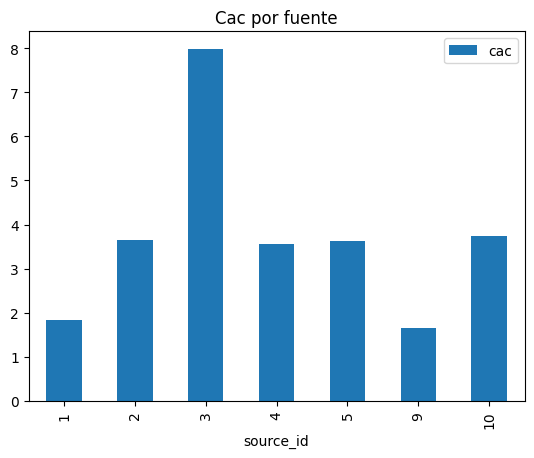

In [62]:
daily_cac=pd.merge(daily_costs,daily_adquisition,
                  on=['day','source_id']
                  )
daily_cac['cac'] = daily_cac['costs']  /  daily_cac['new_users']  
daily_cac.groupby('source_id')['cac'].mean().reset_index().plot(kind='bar',
                                                               title='Cac por fuente',
                                                               x='source_id',
                                                               y='cac')


podemos observar que el cac en la fuente numero 3 es el mas alto, mien tras que el 9 es el mas bajo

 # ROMI

In [63]:
visits_orders=pd.merge(visits[['Source Id','Uid']],orders[['Revenue','Uid']] ,on ='Uid')
visits_orders

,Source Id,Uid,Revenue
0,9,16174680259334210214,2.33
1,4,16174680259334210214,2.33
2,5,16007536194108375387,2.44
3,5,16007536194108375387,1.53
4,5,16007536194108375387,1.53
...,...,...,...
761802,3,6752020629696526518,4.15
761803,4,11750532881998794555,3.67
761804,4,11202626539189016002,3.05
761805,10,12734910664455613822,0.49


In [64]:
costs_source=(costs
             .groupby('source_id')['costs']
             .sum()
             .reset_index()
             )
costs_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [65]:
visits_orders_sources = visits_orders.groupby('Source Id').agg({'Uid':'nunique', 'Revenue':'sum'}).round().reset_index()
visits_orders_sources.columns = ['source_id', 'n_buyers', 'revenue']
visits_orders_sources
source_orders_costs = pd.merge(visits_orders_sources, costs_source, on='source_id')

source_orders_costs['cac'] = source_orders_costs['costs'] / source_orders_costs['n_buyers']

source_orders_costs.sort_values(by=['cac'], ascending=False)

,source_id,n_buyers,revenue,costs,cac
2,3,13846,296688.0,141321.63,10.206676
1,2,7305,2638189.0,42806.04,5.859828
4,5,10156,1181477.0,51757.10,5.096209
3,4,14253,496690.0,61073.60,4.284965
6,10,1773,14619.0,5822.49,3.283976
0,1,7138,2298200.0,20833.27,2.918642
5,9,2793,36342.0,5517.49,1.975471


In [66]:
source_orders_costs['ltv']=source_orders_costs['revenue'] / source_orders_costs['n_buyers']
source_orders_costs['romi']=source_orders_costs['ltv'] / source_orders_costs['cac']
source_orders_costs


,source_id,n_buyers,revenue,costs,cac,ltv,romi
0,1,7138,2298200.0,20833.27,2.918642,321.966938,110.313935
1,2,7305,2638189.0,42806.04,5.859828,361.148392,61.631232
2,3,13846,296688.0,141321.63,10.206676,21.427705,2.099381
3,4,14253,496690.0,61073.60,4.284965,34.848102,8.132647
4,5,10156,1181477.0,51757.10,5.096209,116.332907,22.827342
5,9,2793,36342.0,5517.49,1.975471,13.011815,6.586691
6,10,1773,14619.0,5822.49,3.283976,8.245347,2.510781


Podemos observar que el romi con fuente numero 1 es el mas alto y el 3 ademas de ser el romi mas bajo, tiene un costo demasiado elevado.
    


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Muy bien realizado los cálculos!
</div>

# Conclusión General: Consejos para Inversión de Marketing

- **Invertir Más en las Fuentes con Mayor ROMI**:
  - **Fuente 1**: Tiene un ROMI extremadamente alto (110.313935), lo que sugiere que por cada unidad monetaria invertida, se generan aproximadamente 2,095,740 unidades monetarias en ingresos. Esta fuente es la más eficiente y debería recibir la mayor parte de la inversión de marketing.
  - **Fuente 2**: También muestra un ROMI muy alto (61.631232), lo que indica una excelente rentabilidad. Es una fuente muy eficiente y una inversión adicional sería recomendable.
 

- **Reducir o Reconsiderar Inversiones en Fuentes con Menor ROMI**:
  - **Fuente 10** y **Fuente 3**: Aunque son rentables , generan mucho menos retorno comparado con las fuentes principales. Se recomienda evaluar si el costo de oportunidad de invertir en estas fuentes justifica su rendimiento.


<div class="alert alert-block alert-info">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecho Alejandro! De manera general puedo decirte que presentaste un proyecto muy completo, revisaste minusiosamente cada punto de interés para este caso de análisis lo cual demuestra tu capacidad análitica y sobre todo en cómo te apoyas en datos para poder generar las conclusiones acertadas. 
    
Te felicito por como redactaste la parte final dando recomendaciones para los próximos pasos a realizar, parte de un análsis es ayudar a la toma de decisiones basadas en datos.
  
Hay un par de puntos que se pueden complementar mejor, te he dejado algunos comentarios.
    
Saludos!
</div>